# Python notebook used to tune the model for the Higgs Boson Challenge

#### EPFL - Machine Learning - Autumn 2019

## 1) Header

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from proj1_helpers import *
from implementations import *
from helpers import *

%load_ext autoreload
%autoreload 2

#### Randomisation

In [2]:
seed=374534
np.random.seed(seed)

## 2) Data loading

In [3]:
DATA_TRAIN_PATH = '../Data/train.csv' 
tx_0_train, tx_1_train, tx_2_train, tx_3_train = data_processing(DATA_TRAIN_PATH);

#DATA_TEST_PATH = '../Data/test.csv' 
#tx_0_test, tx_1_test, tx_2_test, tx_3_test = data_processing(DATA_TEST_PATH);

tx_0_train: (99913, 18)
tx_1_train: (77544, 22)
tx_2_train: (50379, 29)
tx_3_train: (22164, 29)


## 3) Functions needed to perform the model tuning

Skip to part 4) for the actual model tuning

In [6]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold cross-validation."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation(y, x, k_indices, k, lambda_, degrees, method, initial_w, max_iters, gamma):
    """return the accuracy of given method."""
    y_test=y[k_indices[k,:]]
    x_test=x[k_indices[k,:]]   
    y_train=np.delete(y,k)
    x_train=np.delete(x,k,0)
    
    y_pred_train, y_pred_test = prediction(x_train, y_train, x_test, degrees,lambda_, method, initial_w, max_iters, gamma)
    
    accuracy_train, F1_train = check_accuracy(y_pred_train, y_train)
    accuracy_test, F1_test = check_accuracy(y_pred_test, y_test)
    return accuracy_train, accuracy_test, F1_train, F1_test

def cross_validation_visualization(lambdas, acc_tr, acc_te, f1_tr, f1_te):
    """visualization of the accuracy and the f1 score for the train data and the test data."""
    fig = plt.figure()
    fig.set_size_inches(12,4)
    ax_acc = fig.add_subplot(1, 2, 1)
    ax_f1 = fig.add_subplot(1, 2, 2)
    
    ax_acc.set_xlabel('lambda')
    ax_acc.set_ylabel('accuracy')
    ax_acc.semilogx(lambdas, acc_tr, marker=".", color='b', label='train accuracy')
    ax_acc.semilogx(lambdas, acc_te, marker=".", color='r', label='test accuracy')
    ax_acc.set_title('Accuracy')           
    ax_acc.grid(True)
    ax_acc.legend(loc=2)
    
    ax_f1.set_xlabel('lambda')
    ax_f1.set_ylabel('f1 score')
    ax_f1.semilogx(lambdas, f1_tr, marker=".", color='b', label='train f1 score')
    ax_f1.semilogx(lambdas, f1_te, marker=".", color='r', label='test f1 score')
    ax_f1.set_title('F1 score')           
    ax_f1.grid(True)
    ax_f1.legend(loc=2)
    
    fig.savefig('cross_validation')


def cross_validation_demo(y, x, k_fold, lambdas, degrees,seed=1, method="RLR", initial_w=None,
               max_iters=10000, gamma=1e-10):
    """to do"""
    k_indices = build_k_indices(y, k_fold,seed)
    acc_tr = []
    acc_te = []
    f1_tr = []
    f1_te = []
    for lambda_ in lambdas:
        acc_tr_lambda=0;
        acc_te_lambda=0;
        f1_tr_lambda=0;
        f1_te_lambda=0;
        for k in range(k_fold):
            accuracy_train, accuracy_test, f1_train, f1_test = cross_validation(y, x, k_indices, k, lambda_, degrees, method, initial_w, max_iters, gamma)
            
            acc_tr_lambda += accuracy_train/k_fold
            acc_te_lambda += accuracy_test/k_fold
            f1_tr_lambda += f1_train/k_fold
            f1_te_lambda += f1_test/k_fold
            
        acc_tr.append(acc_tr_lambda)
        acc_te.append(acc_te_lambda)
        f1_tr.append(f1_tr_lambda)
        f1_te.append(f1_te_lambda)
       
    cross_validation_visualization(lambdas, acc_tr, acc_te, f1_tr, f1_te)



## 4) Model tuning

Lambda=1e-15:
 The train data accuracy of the model is 0.8181636327265454 
The train data f1 score of the model is 0.7066795740561471 
Lambda=1e-15:
 The train data accuracy of the model is 0.8169633926785357 
The train data f1 score of the model is 0.7049338922928087 
Lambda=1e-15:
 The train data accuracy of the model is 0.8177635527105421 
The train data f1 score of the model is 0.706413148565904 
Lambda=1e-15:
 The train data accuracy of the model is 0.8169633926785357 
The train data f1 score of the model is 0.7047434656340756 
Lambda=1e-14:
 The train data accuracy of the model is 0.8181636327265454 
The train data f1 score of the model is 0.7066795740561471 
Lambda=1e-14:
 The train data accuracy of the model is 0.8169633926785357 
The train data f1 score of the model is 0.7049338922928087 
Lambda=1e-14:
 The train data accuracy of the model is 0.8177635527105421 
The train data f1 score of the model is 0.706413148565904 
Lambda=1e-14:
 The train data accuracy of the model is 0.

Lambda=1e-9:
 The train data accuracy of the model is 0.8321664332866573 
The train data f1 score of the model is 0.7332273449920509 
Lambda=1e-9:
 The train data accuracy of the model is 0.8319663932786557 
The train data f1 score of the model is 0.7329942784488238 
Lambda=1e-9:
 The train data accuracy of the model is 0.8319663932786557 
The train data f1 score of the model is 0.7326543602800764 
Lambda=1e-8:
 The train data accuracy of the model is 0.8319663932786557 
The train data f1 score of the model is 0.7326543602800764 
Lambda=1e-8:
 The train data accuracy of the model is 0.8319663932786557 
The train data f1 score of the model is 0.732824427480916 
Lambda=1e-8:
 The train data accuracy of the model is 0.8317663532706542 
The train data f1 score of the model is 0.7324212535793827 
Lambda=1e-8:
 The train data accuracy of the model is 0.8319663932786557 
The train data f1 score of the model is 0.7324840764331211 
Lambda=1e-7:
 The train data accuracy of the model is 0.8295659

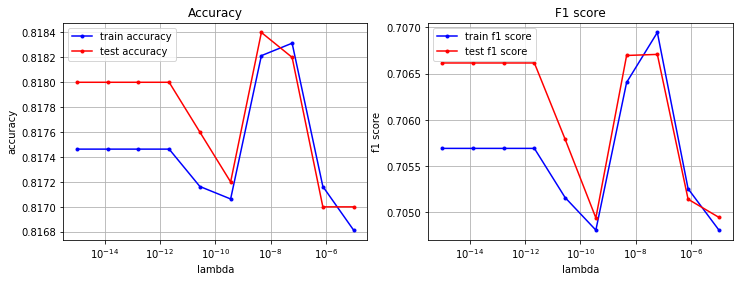

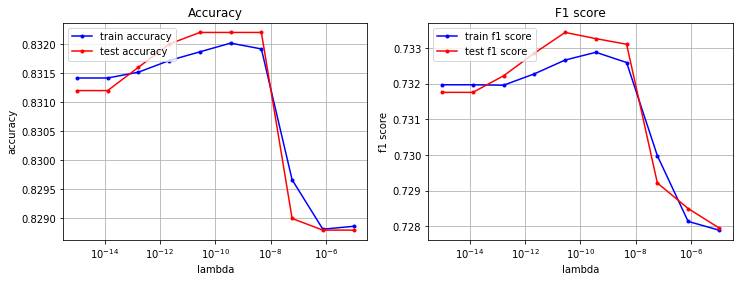

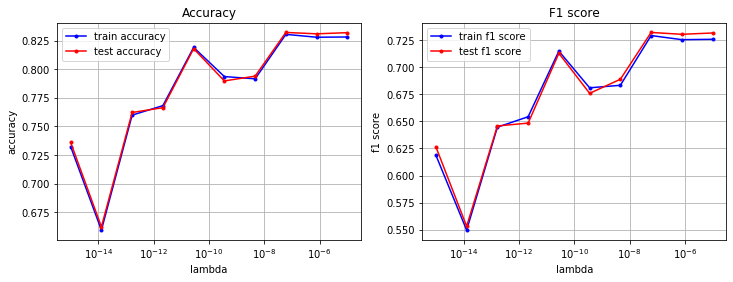

In [8]:
#degrees = [5,6,7,8,9,10]
degrees = [6,8,10]
k_fold = 4
lambdas = np.logspace(-15, -5, 10)
for degree in degrees:
    print("\n###############################################################\nDegree : ", degree)
    cross_validation_demo(y_train, x_train, k_fold, lambdas, degree, seed=154, method="RR", initial_w=None, max_iters=20000, gamma=1e-40)

## 6) Prediction of the test data labels

In [20]:
degree=8
minusloglambda=10
lambda_=10**(-minusloglambda)

y_tr_pd, y_te_pd = prediction(x_train, y_train, x_test, degree,lambda_,"RR",initial_w=None,
               max_iters=10000, gamma=1e-1)
name="submission_{0}_{1}.csv".format(degree,minusloglambda)
create_csv_submission(ids_test, y_te_pd, name)

Lambda=1e-10:
 The train data accuracy of the model is 0.810656 
The train data f1 score of the model is 0.7066362577158581 


## 7) Test of each Method from implementations.py

In [44]:
# Using x_train and y_train as data

# Parameters

from helpers import *

degree = 3
tx_train = build_poly(x_train,degree)
initial_w = np.zeros(tx_train.shape[1])
max_iters = 1000
gamma = 1e-30
lambda_ = 1e-3


#least_squares_GD(y_train, tx_train, initial_w, max_iters, gamma)
#least_squares_SGD(y_train, tx_train, initial_w, max_iters, gamma)
#least_squares(y_train, tx_train)
#ridge_regression(y_train, tx_train, lambda_)
#logistic_regression(y_train, tx_train, initial_w, max_iters, gamma)
#reg_logistic_regression(y_train, tx_train, lambda_, initial_w, max_iters, gamma)


## 8) Principal Component Analysis

In [121]:
# Performing assembly and eigenvalue decomposition of covariance matrix step by step

def standardize(tx):
    tx_means = np.mean(tx, axis=0)
    tx_pca = np.copy(tx)
    
    d = tx.shape[1]
    n = tx.shape[0]
    
    for i in range(d):
        tx_pca[:,i] = 1/np.sqrt(n-1)*(tx_pca[:,i] - tx_means[i]*np.ones([n]))
    return tx_pca
tx_pca = standardize(x_train)
Cc = tx_pca.T@tx_pca
eigc, Pc = np.linalg.eig(Cc)
Dc = np.diag(eigc)

In [200]:
# Using numpy library to compute eigenvalue decomposition of covariance matrix

C = np.cov(x_train.T)
eigs, P = np.linalg.eig(C)
D = np.diag(eigs)
print(eigs)

[1.99745997e+06 4.69495400e+05 1.64713566e+05 3.46645379e+04
 1.94660070e+04 2.24176514e+03 1.85633056e+03 1.26910588e+03
 8.75888764e+02 4.94256307e+02 3.37970395e+02 3.73872355e+02
 1.80165009e+02 1.33455902e+02 4.61683273e+01 4.00372438e+00
 3.50132736e+00 2.75151029e+00 2.41971030e+00 1.65921609e+00
 1.43527408e+00 1.02450098e+00 7.22270371e-01 7.09129484e-01
 6.02506001e-01 1.85023000e-01 1.01766708e-01 5.84005525e-02
 2.66538929e-02 7.60342251e-08]


([<matplotlib.axis.XTick at 0x1439d27b8>,
 <a list of 29 Text xticklabel objects>)

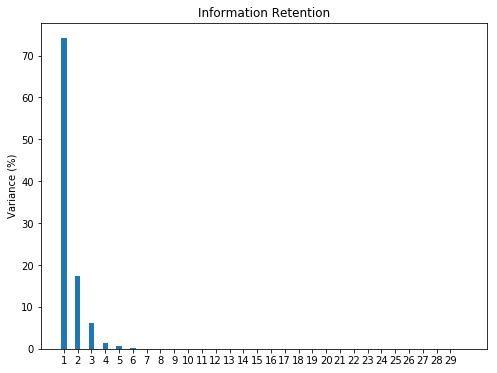

In [201]:
plt.figure(figsize=(8,6))
plt.bar(np.arange(1,31,1),eigs/sum(eigs)*100,align='center',width=0.4)
plt.ylabel('Variance (%)')
plt.title('Information Retention')
plt.xticks(np.arange(1,30,1)) 

In [202]:
i = 0
S = 0
while S<99:
    S += eigs[i]/sum(eigs)*100
    i += 1
print(S)
print(i)

99.70938152385665
5


In [218]:
X = x_train@P[:,0:15]

(5000, 15)


ModuleNotFoundError: No module named 'logistic_regression.py'; 'logistic_regression' is not a package